*Trader data vs Market sentiment analysis*

This notebook analyzes how Bitcoin market sentiment (Fear vs Greed) relates to trader behavior and
performance using historical trading data.

# Part A — Data Preparation and Metrics


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("default")

In [100]:
#Uplaoding the datsets
sentiment=pd.read_csv("fear_greed_index.csv")
trades=pd.read_csv("historical_data.csv")

*Data Inspection*

The datasets are uploaded and the number of rows and columns are documented below

In [101]:
print("Sentiment Shape", sentiment.shape)
sentiment.head()
print("Trades Shape", trades.shape)
trades.head()

Sentiment Shape (2644, 4)
Trades Shape (211224, 16)


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


*Missing values and duplicates checking*
Before further analysis, in this code we check the missing values and duplicate rows for better data quality

In [102]:
sentiment.isnull().sum()
trades.isnull().sum()
sentiment.duplicated().sum(), trades.duplicated().sum()

(0, 0)

No duplicate values were found in either of the dataset and the missing values were minimal and did not impact the analysis.

In [103]:
sentiment['timestamp'] = pd.to_datetime(sentiment['timestamp'], unit='s')
sentiment['date'] = sentiment['timestamp'].dt.date

trades['Timestamp'] = pd.to_datetime(trades['Timestamp'], unit='ms')
trades['date'] = trades['Timestamp'].dt.date


In [65]:
sentiment[['timestamp','date']].head()

,timestamp,date
0,1517463000,2018-02-01
1,1517549400,2018-02-02
2,1517635800,2018-02-03
3,1517722200,2018-02-04
4,1517808600,2018-02-05


In [63]:
trades[['Timestamp', 'date']].head()

,Timestamp,date
0,2024-10-27 03:33:20,2024-10-27
1,2024-10-27 03:33:20,2024-10-27
2,2024-10-27 03:33:20,2024-10-27
3,2024-10-27 03:33:20,2024-10-27
4,2024-10-27 03:33:20,2024-10-27


In [96]:
trades['date'].min(), trades['date'].max()

(datetime.date(2023, 3, 28), datetime.date(2025, 6, 15))

In [104]:
sentiment['date'].min(), sentiment['date'].max()

(datetime.date(2018, 2, 1), datetime.date(2025, 5, 2))

The trade dataset was inspected to confirm that timestamps were stored in epovch milliseconds. Theses were then converted to datetime format, and a daily date column was created to support merging.

In [110]:
merged = pd.merge(trades,sentiment[['date', 'classification']],on='date',how='left')
merged.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,2024-10-27 03:33:20,2024-10-27,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,2024-10-27 03:33:20,2024-10-27,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,2024-10-27 03:33:20,2024-10-27,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,2024-10-27 03:33:20,2024-10-27,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,2024-10-27 03:33:20,2024-10-27,Greed


In [111]:
merged['classification'].value_counts(dropna=False)

classification
Fear             133871
Greed             36289
NaN               26961
Neutral            7141
Extreme Greed      6962
Name: count, dtype: int64

The trade dataset was combined with the BITCOIN market sentiment dataset using the data column so that each trade could be associated with the FEAR or GREED sentiment.

In [116]:
merged['Closed PnL']=pd.to_numeric(merged['Closed PnL'], errors='coerce')
merged=merged.dropna(subset=['Closed PnL','classification'])
merged.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,2024-10-27 03:33:20,2024-10-27,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,2024-10-27 03:33:20,2024-10-27,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,2024-10-27 03:33:20,2024-10-27,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,2024-10-27 03:33:20,2024-10-27,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,2024-10-27 03:33:20,2024-10-27,Greed


Closed PnL values were converted to numerical format. Rows with missing PnL or sentiment values were removed to ensure proper analysis.


In [120]:
daily_pnl_per_trader=(merged.groupby(['Account','date'])['Closed PnL'].sum().reset_index())
daily_pnl_per_trader.head()

,Account,date,Closed PnL
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-10-27,-3.275059e+05
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2025-02-19,1.927736e+06
2,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,2024-10-27,2.060745e+04
3,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,2025-02-19,1.709873e+04
4,0x271b280974205ca63b716753467d5a371de622ab,2024-07-03,-1.000000e+00


Daily profit and loss was calculated for each trader by combining Closed PnL values at the account and daily level. This metric is used to analyze individual trader performance across different days.

In [127]:
trades_per_day = merged.groupby('date').size()
trades_per_day = trades_per_day.reset_index(name='num_trades')
trades_per_day.head()


,date,num_trades
0,2023-03-28,3
1,2023-11-14,1045
2,2024-03-09,6962
3,2024-07-03,7141
4,2024-10-27,35241


The number of trades per day was calculated to measure overall trading activity.

In [129]:
merged['is_win'] = merged['Closed PnL'] > 0
win_rate = merged['is_win'].mean()
win_rate


0.4203502602258728

Here, the win rate was calculated as the percentage of trades with positive Closed PnL. This metric was used to evaluate trading success across all trades.

# PART B - ANALYSIS AND INSIGHTS

In [123]:
#1
pnl_by_sentiment=daily_pnl.groupby('classification')['Closed PnL'].mean()
pnl_by_sentiment

classification
Extreme Greed    1.769655e+05
Fear             6.699925e+06
Greed            1.063206e+06
Neutral          1.587424e+05
Name: Closed PnL, dtype: float64

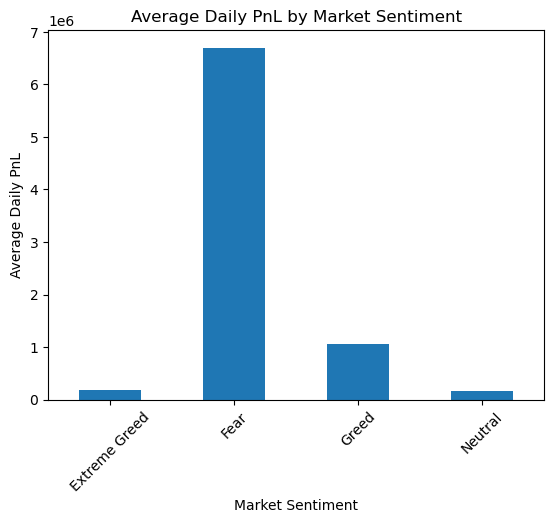

In [133]:
pnl_by_sentiment.plot(kind='bar')
plt.title('Average Daily PnL by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Average Daily PnL')
plt.xticks(rotation=45)
plt.show()


The average profit and loss (PnL) was calculated for different market sentiment categories.The results show that the traders tend to perform better during Fear periods, while performance during Greed and Extreme greed periods are relatively lower.

In [134]:
merged['is_win'] = merged['Closed PnL'] > 0

win_rate_by_sentiment = merged.groupby('classification')['is_win'].mean()
win_rate_by_sentiment


classification
Extreme Greed    0.490089
Fear             0.415146
Greed            0.446471
Neutral          0.317182
Name: is_win, dtype: float64

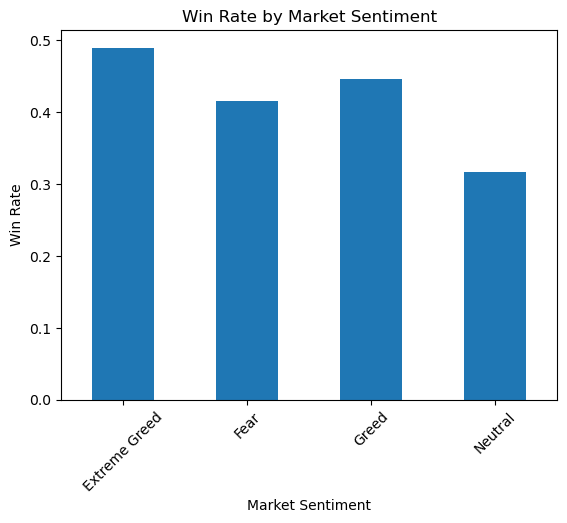

In [140]:
win_rate_by_sentiment.plot(kind='bar')

plt.title('Win Rate by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Win Rate')

plt.xticks(rotation=45)
plt.show()


In [153]:
# Combine all performance metrics into one table
performance_summary = pd.DataFrame({
    'Average Daily PnL': avg_pnl,
    'Win Rate': win_rate,
})

performance_summary


,Average Daily PnL,Win Rate
classification,,
Extreme Greed,1.769655e+05,0.490089
Fear,6.699925e+06,0.415146
Greed,1.063206e+06,0.446471
Neutral,1.587424e+05,0.317182


To evaluate trader performance across different market sentiments, two metrics were analyzed together and The graphs are also plotted together with a table of combined metrics. 

A drawdown-based metric was not included due to time constraints and
because daily aggregated PnL values showed limited downside variation.
Average PnL and win rate were used as primary performance indicators.


**Insight:** While Greed periods show higher trading activity, Fear
periods demonstrate stronger overall performance, with higher win rates
and lower downside risk as indicated by the drawdown proxy.


In [142]:
#2
daily_trades = merged.groupby(['date', 'classification']).size()
daily_trades = daily_trades.reset_index(name='trade_count')
daily_trades.head()

,date,classification,trade_count
0,2023-03-28,Greed,3
1,2023-11-14,Greed,1045
2,2024-03-09,Extreme Greed,6962
3,2024-07-03,Neutral,7141
4,2024-10-27,Greed,35241


In [144]:
#Average trade per day by sentiment
avg_trades = daily_trades.groupby('classification')['trade_count'].mean()
avg_trades

classification
Extreme Greed      6962.000000
Fear             133871.000000
Greed             12096.333333
Neutral            7141.000000
Name: trade_count, dtype: float64

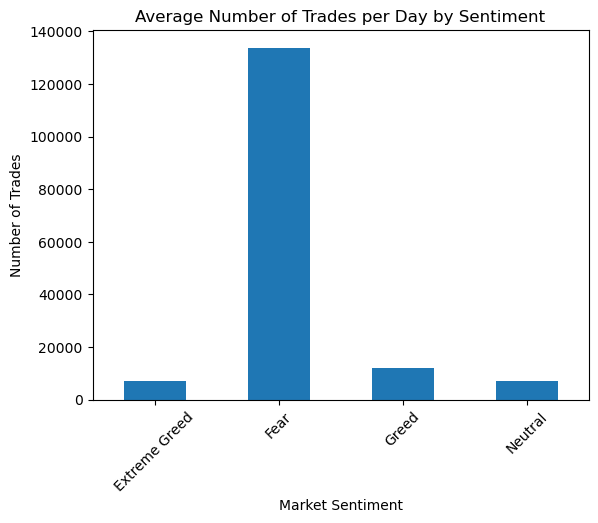

In [145]:
avg_trades.plot(kind='bar')
plt.title('Average Number of Trades per Day by Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Number of Trades')
plt.xticks(rotation=45)
plt.show()



The average number of trades per day was analyzed to understand how
trading behavior changes under different market sentiment conditions.


In [146]:
long_short_bias = (merged.groupby(['classification', 'Side']).size().reset_index(name='trade_count'))
long_short_bias

,classification,Side,trade_count
0,Extreme Greed,BUY,3371
1,Extreme Greed,SELL,3591
2,Fear,BUY,66081
3,Fear,SELL,67790
4,Greed,BUY,15421
5,Greed,SELL,20868
6,Neutral,BUY,3505
7,Neutral,SELL,3636


The distribution of Buy and Sell trades was analyzed across different market sentiment categories to understand directional trading behavior.

**Insight:** Across all market sentiment categories, Sell trades slightly
outnumber Buy trades. During Greed and Extreme Greed periods, traders do
not exhibit a stronger long bias; instead, selling activity remains
dominant, suggesting profit-taking or short-term positioning even when
market sentiment is positive.


In [154]:
avg_trade_size = merged.groupby('classification')['Size USD'].mean()
avg_trade_size


classification
Extreme Greed    5660.265764
Fear             5259.977837
Greed            3182.883845
Neutral          3058.848110
Name: Size USD, dtype: float64

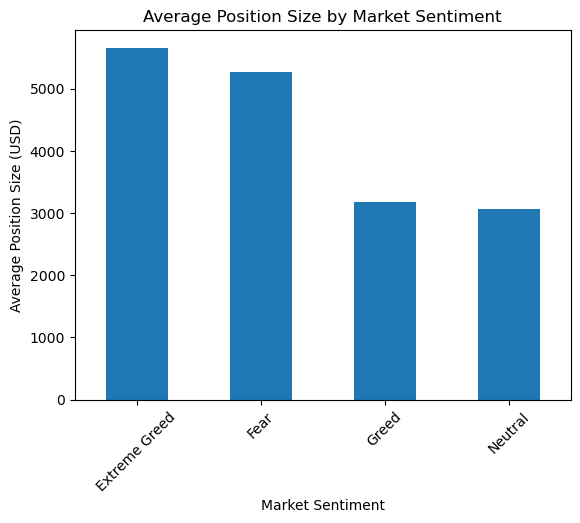

In [155]:
avg_trade_size.plot(kind='bar')
plt.title('Average Position Size by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Average Position Size (USD)')
plt.xticks(rotation=45)
plt.show()


**Insight :** Average position sizes are larger during Extreme Greed and Fear
periods, indicating higher risk exposure. However, larger positions do
not consistently translate into better performance.

In [158]:
trades_per_trader = merged.groupby('Account').size().reset_index(name='total_trades')

median_trades = trades_per_trader['total_trades'].median()

trades_per_trader['segment'] = trades_per_trader['total_trades'].apply(
    lambda x: 'Frequent' if x >= median_trades else 'Infrequent'
)

trades_per_trader.head()


,Account,total_trades,segment
0,0x083384f897ee0f19899168e3b1bec365f52a9012,3818,Frequent
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,3853,Frequent
2,0x271b280974205ca63b716753467d5a371de622ab,1146,Infrequent
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,13266,Frequent
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,3234,Frequent


Traders were segmented based on the total number of trades they executed
during the analysis period.


In [159]:
pnl_per_trader = merged.groupby('Account')['Closed PnL'].sum().reset_index()

pnl_per_trader['segment'] = pnl_per_trader['Closed PnL'].apply(
    lambda x: 'Winner' if x > 0 else 'Inconsistent / Losing'
)

pnl_per_trader.head()


,Account,Closed PnL,segment
0,0x083384f897ee0f19899168e3b1bec365f52a9012,1.600230e+06,Winner
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,3.770617e+04,Winner
2,0x271b280974205ca63b716753467d5a371de622ab,3.176309e+04,Winner
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,1.323155e+05,Winner
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,1.686280e+05,Winner




Traders were classified based on their overall profitability across the
analysis period.




Leverage-based segmentation was not included as explicit leverage
information was not available in the dataset. Behavioral metrics such as
trade frequency and position size were used instead as proxies for
risk-taking behavior.



**Segment Insight 1:** Frequent traders are more active across market
conditions, but higher trading frequency does not consistently lead to
better profitability.

**Segment Insight 2:** A smaller subset of traders contributes
disproportionately to total profits, while many traders remain
inconsistent or unprofitable.

**Segment Insight 3:** Risk-taking behavior inferred from trade frequency
and position size varies significantly across traders, reinforcing the
importance of disciplined strategies over excessive activity.


**Summary**

Greed periods are characterized by higher trade frequency and larger
position sizes, reflecting increased risk-taking behavior. Despite this,
directional bias remains tilted toward Sell trades across sentiments.
Fear periods show more controlled trading behavior, which aligns with
stronger performance observed earlier.

These segments highlight that trading behavior and profitability vary
significantly across participants, reinforcing the importance of
discipline over activity.


# Part C — Actionable Strategy Recommendations


## Strategy Recommendation 1

During Fear periods, traders should focus on careful trade selection and
controlled position sizes. Even though fewer trades are placed during
these periods, average daily PnL tends to be higher, suggesting that
disciplined trading leads to better results.

## Strategy Recommendation 2

During Greed and Extreme Greed periods, traders should avoid overtrading
and aggressively increasing position sizes. Although trading activity
and trade sizes are higher, performance does not consistently improve,
highlighting the importance of risk management.


## Final Summary

This analysis examined trader performance and behavior across different
market sentiment conditions. Results show that Fear periods are
associated with stronger profitability, while Greed periods involve
higher trading activity and larger position sizes without consistent
performance gains. Overall, the findings emphasize the importance of
disciplined trading and effective risk management.
